# Stiff Ordinary Differential Equations



In [1]:
import numpy as np 
import matplotlib.pyplot as plt 



In [2]:
# ex 23.1

# predator-prey model
def dydt (t,y):
    n = len(y)
    dy = np.zeros(n)
    dy[0] = 1.2 * y[0] - 0.6 * y[0] * y[1]
    dy[1] = -0.8*y[1] + 0.3 * y[0] * y[1] 
    return dy 

from scipy.integrate import solve_ivp 

ti = 0.  
tf = 20. 
y0 = np.array([2.,1.])
tspan = np.linspace(ti,tf,101)
result = solve_ivp(dydt, (ti,tf), y0, t_eval=tspan)
tt = result.t
yy = result.y

In [7]:
yy.shape

(2, 101)

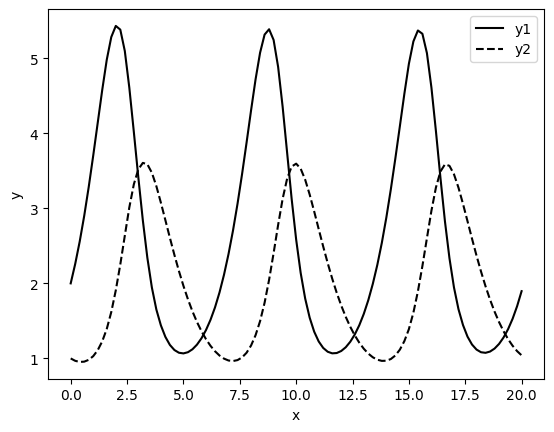

In [9]:
# plt.scatter(x_euler,y_euler,c='k',marker='o')
# plt.plot(,y_euler,c='k',marker='o',ls='--',label='Euler f(t)')
plt.plot(tt,yy[0],c='k',ls='-',label='y1')
plt.plot(tt,yy[1],c='k',ls='--',label='y2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


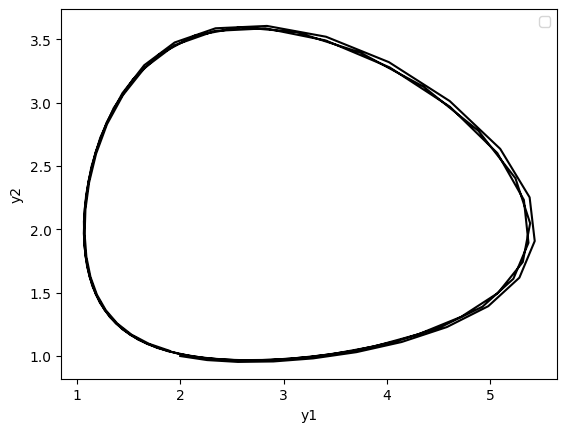

In [12]:
# - - - Phase plot - - - 

# plt.scatter(x_euler,y_euler,c='k',marker='o')
plt.plot(yy[0],yy[1],c='k',ls='-')
# plt.plot(tt,yy[1],c='k',ls='--',label='y2')
plt.xlabel('y1')
plt.ylabel('y2')
plt.legend()

In [23]:
# ex 23.2

dydt = lambda t,y: 10.*np.exp(-(t-2.)**2/(2*0.075**2)) - 0.6*y 

ti = 0.
tf = 4.
# tspan = np.linspace(ti,tf,101)
y0 = np.array([0.5])

result = solve_ivp(dydt,(ti,tf), y0, method='RK23')
tt = result.t 
yy = result.y.squeeze()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


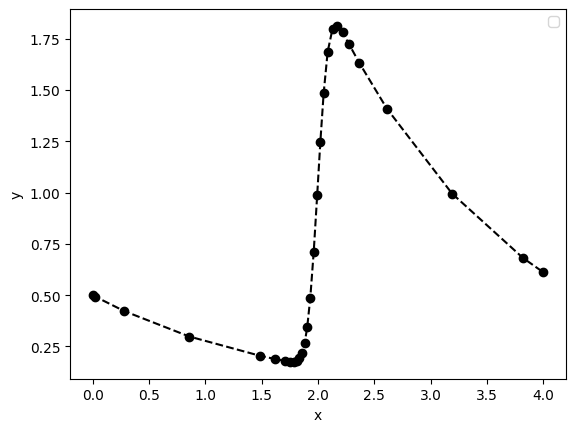

In [24]:
plt.plot(tt,yy,c='k',ls='--',marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


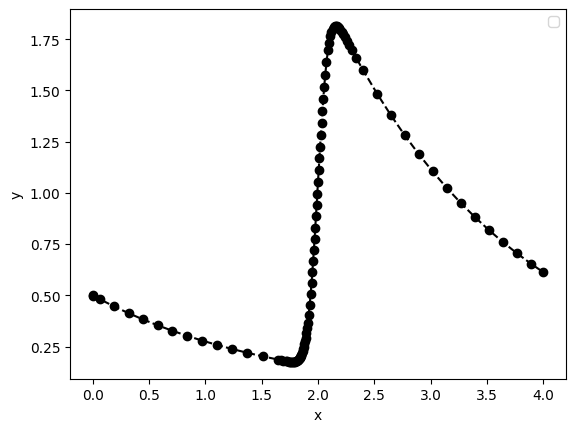

In [25]:
# ex 23.2

dydt = lambda t,y: 10.*np.exp(-(t-2.)**2/(2*0.075**2)) - 0.6*y 

ti = 0.
tf = 4.
y0 = np.array([0.5])

result = solve_ivp(dydt,(ti,tf), y0, method='RK23',rtol = 1e-5)
tt = result.t 
yy = result.y.squeeze()

plt.plot(tt,yy,c='k',ls='--',marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()



In [36]:
# ex 23.3, Heun's method 

y_true= lambda t: 4./1.3 * (np.exp(0.8*t) - np.exp(-0.5*t)) + 2*np.exp(-0.5*t) 
dydt = lambda t,y: 4.* np.exp(0.8*t) - 0.5 * y

ti = 0.
tf = 4.
t0 = 0.
y0 = 2.

def HeunStep(dt,tn,yn,dydt):

    # prediction (Euler)
    ynp1 = yn + dt * dydt(tn,yn)

    # correction 
    avgslope = (dydt(tn,yn) + dydt(tn+dt,ynp1) )/2.
    ynp = yn + dt * avgslope
    
    return ynp 

dt = 1.
t1 = t0 + dt
y1 = HeunStep(dt,t0,y0,dydt)
print('y1=',y1)
print('y1_true=',y_true(t1))
print('et = ', np.abs((y_true(t1) - y1)/y_true(t1) )*100.)


y1= 6.701081856984936
y1_true= 6.194631377209372
et =  8.175635464586998


In [4]:
# ex 23.3, Heun's method 

dydt = lambda t,y: 4.* np.exp(0.8*t) - 0.5 * y

ti = 0.
tf = 4.
t0 = 0.
y0 = 2.

def NonSelfStartingHeunStep(dt,tn,yn,ynm,dydt):

    # prediction (central FD)
    ynp1 = ynm + 2.*dt * dydt(tn,yn)

    # correction 
    avgslope = (dydt(tn,yn) + dydt(tn+dt,ynp1) )/2.
    ynp = yn + dt * avgslope
    
    return ynp 

ym1 = -0.3929953
y1 = NonSelfStartingHeunStep(1.,t0,y0,ym1,dydt)
print('y1=',y1)
print('y1_true=',y_true(t1))
print('et = ', np.abs((y_true(t1) - y1)/y_true(t1) )*100.)

# This approach requires ym1 at t=-1


y1= 6.5493306819849355


NameError: name 'y_true' is not defined